# Priprema za kolokvijum

In [1]:
import numpy as np
import pandas as pd
import utils_nans1 as utils

import statsmodels.api as sm
import matplotlib.pyplot as plt


In [2]:
train_df = pd.read_csv("./data/train.csv")

In [3]:
train_df.head()

,plata,zvanje,oblast,godina_doktor,godina_iskustva,pol Zenski,pol Muski
0,77500,1.0,0,NaN,2,1,0
1,142253,3.0,1,49.0,60,0,1
2,124714,NaN,1,23.0,15,0,1
3,147765,3.0,1,45.0,45,0,1
4,106294,NaN,0,21.0,8,0,1


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   plata            297 non-null    int64  
 1   zvanje           238 non-null    float64
 2   oblast           297 non-null    int64  
 3   godina_doktor    253 non-null    float64
 4   godina_iskustva  297 non-null    int64  
 5   pol Zenski       297 non-null    int64  
 6   pol Muski        297 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 16.4 KB


In [5]:
utils.check_for_missing_values(train_df)

,N missing,% missing
zvanje,59,19.865320
godina_doktor,44,14.814815


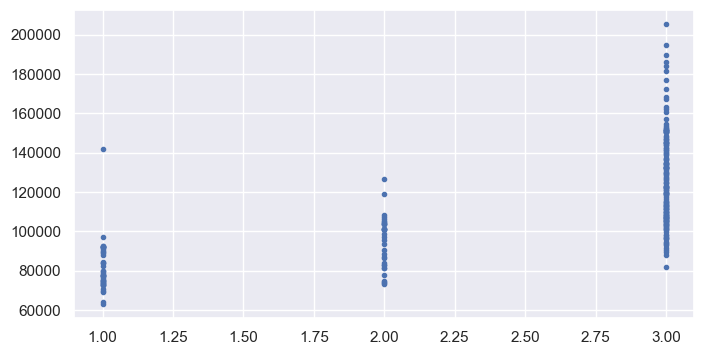

In [6]:
plt.plot(train_df["zvanje"], train_df["plata"], "b.")
plt.show()

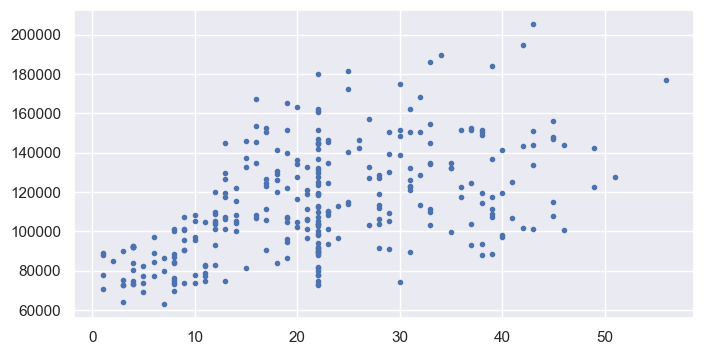

In [7]:
plt.plot(train_df["godina_doktor"].fillna(train_df["godina_doktor"].mean()), train_df["plata"], "b.")
plt.show()

In [8]:
train_df["zvanje"] = train_df["zvanje"].interpolate("cubicspline", limit_direction="both")
train_df["godina_doktor"] = train_df["godina_doktor"].interpolate("linear", limit_direction="both")

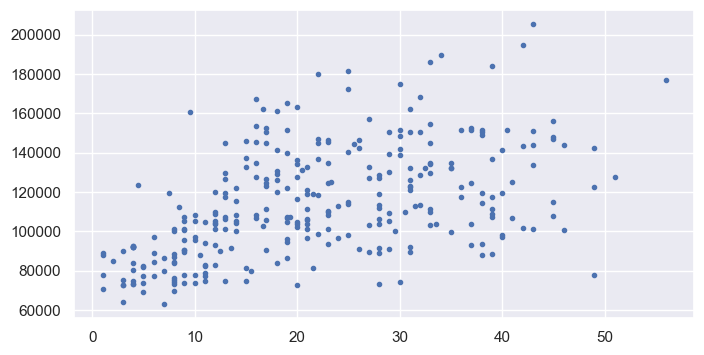

In [9]:
plt.plot(train_df["godina_doktor"], train_df["plata"], "b.")
plt.show()

## Zadatak 1
Napraviti model linearne regresije koji koristi sve atribute. 
Ispisati meru koju model ostvaruje.


In [10]:
features = train_df.drop(columns=["plata"])
lables = train_df["plata"]

In [11]:
features_with_const = sm.add_constant(features)
model = sm.OLS(lables, features_with_const).fit()

print(f"R^2 = {model.rsquared_adj}")
print(f"RMSE: {utils.get_rmse(model, features, lables)}")

R^2 = 0.3579071872302335
RMSE: 22132.83564711739


In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  plata   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     34.00
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           2.59e-27
Time:                        11:30:50   Log-Likelihood:                -3392.9
No. Observations:                 297   AIC:                             6798.
Df Residuals:                     291   BIC:                             6820.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.662e+04   2610.262     17.860      0.000    4.15e+04    5.18e+04
zvanje           4840.6997   1160.176      4.172      0.000    2557.299    7124.101
oblast           1.181e+04   2661.285      4.437      0.000    6569.055     1.7e+04
godina_doktor     938.9117    174.714      5.374      0.000     595.049    1282.774
godina_iskustva   173.3007    165.853      1.045      0.297    -153.122     499.724
pol Zenski       2.043e+04   2818.554      7.248      0.000    1.49e+04     2.6e+04
pol Muski        2.619e+04   2179.640     12.016      0.000    2.19e+04    3.05e+04
==============================================================================
Omnibus:                       19.087   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.864
Skew:                           0.620   Prob(JB):                     2.95e-05
Kurtosis:                       3.384   Cond. No.                     3.16e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.15e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""